In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv("c:/data/hdi/hdi-data2.csv")
df.head()

,Life expectancy at birth,Mean years of schooling,Expected years of schooling,GNI,Export,HDI
0,48.4,3.5,8.2,280,85.119671,0.286
1,54.7,1.4,4.9,641,42.473864,0.295
2,50.4,2.7,10.5,368,42.473864,0.316
3,50.2,1.2,9.2,898,25.251291,0.322
4,49.6,1.5,7.2,1105,43.900000,0.328


In [3]:
train_cols=df.columns[0:5]
print(train_cols)
X=df[train_cols]
y=df["HDI"]
print(df[train_cols].head())
print(y.head())

Index(['Life expectancy at birth', 'Mean years of schooling',
       'Expected years of schooling', 'GNI', 'Export'],
      dtype='object')
   Life expectancy at birth  Mean years of schooling  \
0                      48.4                      3.5   
1                      54.7                      1.4   
2                      50.4                      2.7   
3                      50.2                      1.2   
4                      49.6                      1.5   

   Expected years of schooling   GNI     Export  
0                          8.2   280  85.119671  
1                          4.9   641  42.473864  
2                         10.5   368  42.473864  
3                          9.2   898  25.251291  
4                          7.2  1105  43.900000  
0    0.286
1    0.295
2    0.316
3    0.322
4    0.328
Name: HDI, dtype: float64


In [4]:
x2=df["Life expectancy at birth"].values
y2=df["HDI"].values
result=stats.linregress(x2,y2)
result

LinregressResult(slope=0.016124893707708518, intercept=-0.4599942026967768, rvalue=0.901512974948751, pvalue=3.2847754562701845e-69, stderr=0.0005690863526153063, intercept_stderr=0.040001766674389996)

Text(0, 0.5, 'HDI')

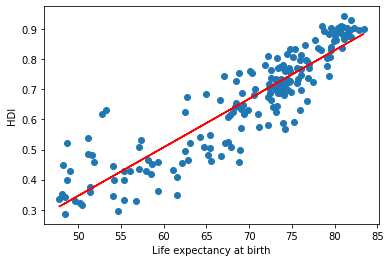

In [5]:
slope, intercept, r_value, p_value, stderr=stats.linregress(x2,y2)
plt.scatter(x2,y2)
plt.plot(x2, slope*x2+intercept, c="red")
plt.xlabel("Life expectancy at birth")
plt.ylabel("HDI")

In [6]:
x2=df["Mean years of schooling"].values
y2=df["HDI"].values
result=stats.linregress(x2,y2)
result

LinregressResult(slope=0.05232467201381997, intercept=0.26456717569801413, rvalue=0.9005296673824346, pvalue=7.857605621581572e-69, stderr=0.0018574055433612318, intercept_stderr=0.015163787346592615)

Text(0, 0.5, 'HDI')

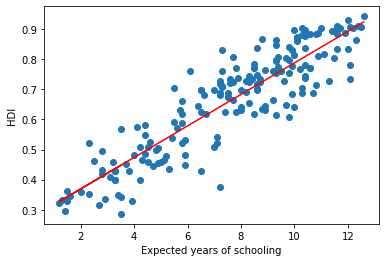

In [7]:
slope, intercept, r_value, p_value, stderr=stats.linregress(x2,y2)
plt.scatter(x2,y2)
plt.plot(x2, slope*x2+intercept, c="red")
plt.xlabel("Expected years of schooling")
plt.ylabel("HDI")

In [8]:
x2=df["GNI"].values
y2=df["HDI"].values
result=stats.linregress(x2,y2)
result

LinregressResult(slope=7.78929215199157e-06, intercept=0.5632858689341738, rvalue=0.7003465074525178, pvalue=6.793224486797103e-29, stderr=5.836836801269087e-07, intercept_stderr=0.011690300709804754)

Text(0, 0.5, 'HDI')

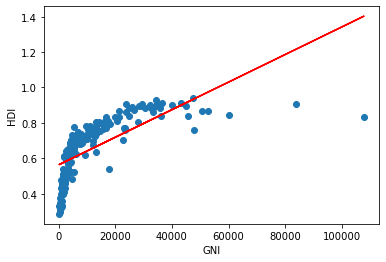

In [9]:
slope, intercept, r_value, p_value, stderr=stats.linregress(x2,y2)
plt.scatter(x2,y2)
plt.plot(x2, slope*x2+intercept, c="red")
plt.xlabel("GNI")
plt.ylabel("HDI")

In [10]:
x2=df["Export"].values
y2=df["HDI"].values
result=stats.linregress(x2,y2)
result

LinregressResult(slope=0.0014930000842694837, intercept=0.5994367855376995, rvalue=0.22835956515234113, pvalue=0.0016695578488607889, stderr=0.000467977534715247, intercept_stderr=0.023361771587009913)

Text(0, 0.5, 'HDI')

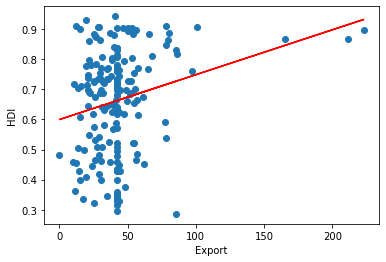

In [11]:
slope, intercept, r_value, p_value, stderr=stats.linregress(x2,y2)
plt.scatter(x2,y2)
plt.plot(x2, slope*x2+intercept, c="red")
plt.xlabel("Export")
plt.ylabel("HDI")

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
result = model.fit()

print("회귀계수\n",result.params) 
print("R-squared\n",result.rsquared)
print("P values\n",result.pvalues)
print(result.summary())

from sklearn.metrics import r2_score
pred=result.predict(X_test)
rsquared=r2_score(y_test, pred)
rsquared

회귀계수
 Life expectancy at birth       0.004653
Mean years of schooling        0.022120
Expected years of schooling    0.011457
GNI                            0.000003
Export                        -0.000128
dtype: float64
R-squared
 0.9983302267104234
P values
 Life expectancy at birth       4.656765e-43
Mean years of schooling        2.521389e-31
Expected years of schooling    2.263664e-10
GNI                            1.533275e-28
Export                         1.509747e-01
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                    HDI   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.722e+04
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                   5.06e-198
Time:                        15:12:27   Log-Likelihood:         

0.9258621508415219

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [14]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test)) 

0.9795845422991336
0.9432099785667011
